In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scanpy as sc
import pandas as pd
import seaborn as sns

In [5]:
dataset = ['mini_V3', 'mini_MN', 'mini_MD',
           'midi_NM', 'midi_Ne', 'maxi']

for name in dataset:
    adata = sc.read_h5ad(f'../data/benchmarking_data/{name}.h5ad')
    print(name, adata.shape[0])
    print()


mini_V3 6798

mini_MN 10180

mini_MD 9786

midi_NM 18341

midi_Ne 20163

maxi 45037



In [37]:
home = '../output_data/'

metrics = ['CBD','CRS','PTS']

ldatasets = ['mini_V3', 'mini_MN', 'mini_MD',
           'midi_NM', 'midi_Ne', 'maxi']
sdatasets = ['splicing_mini_V3', 'splicing_mini_MN', 'splicing_mini_MD',
           'splicing_midi_NM', 'splicing_midi_Ne', 'splicing_maxi']


lmethods = ['velvet_SMOOTH','dynamo']
smethods = ['velvetsplicing_SMOOTH','scVelo','velovi','UniTVelo','kvelo']

mdict = {}
for mtrc in metrics:
    bdict = {}
    for meth in smethods:
        scores = []
        for data in sdatasets:
            if (data != 'splicing_maxi') or (mtrc != 'PTS'):
                try:
                    score = np.load(home+f"{data}_{meth}_{mtrc}.npy")
                except FileNotFoundError:
                    print(f"{data}_{meth}_{mtrc}.npy")

splicing_mini_MN_velovi_CBD.npy
splicing_mini_MD_velovi_CBD.npy
splicing_midi_NM_velovi_CBD.npy
splicing_midi_Ne_velovi_CBD.npy
splicing_maxi_velovi_CBD.npy
splicing_mini_MN_velovi_CRS.npy
splicing_mini_MD_velovi_CRS.npy
splicing_midi_NM_velovi_CRS.npy
splicing_midi_Ne_velovi_CRS.npy
splicing_maxi_velovi_CRS.npy
splicing_mini_MN_velovi_PTS.npy
splicing_mini_MD_velovi_PTS.npy
splicing_midi_NM_velovi_PTS.npy
splicing_midi_Ne_velovi_PTS.npy


# 1. model components

In [29]:
home = '../output_data/'

datasets = ['mini_V3', 'mini_MN', 'mini_MD',
           'midi_NM', 'midi_Ne', 'maxi']

truths = []
for data in datasets[:-1]:
    x = np.load(f'../output_data/{data}_intratruth_baseline.npy')
    truths.append(np.mean(x))

In [3]:
datasets = ['mini_V3', 'mini_MN', 'mini_MD',
           'midi_NM', 'midi_Ne', 'maxi']

conditions = ['RAW','NoC_NoG','NoC_WiG','WiC_NoG']

metrics = ['CBD','CRS','PTS']

mdict = {}
for metric in metrics:
    cdict = {}
    for condition in conditions:
        scores = []
        for data in datasets:
            if (data != 'maxi') or (metric != 'PTS'):
                name = f"{data}_velvet_{condition}_{metric}.npy"
                score = np.load(home+name)
                scores.append(np.mean(score))
        cdict[condition] = scores
    mdict[metric] = cdict
    
metriclist = []
methodlist = []
valueslist = []
for metric, dic in mdict.items():
    submethodlist = []
    subvalueslist = []
    for meth, val in dic.items():
        subvalueslist.extend(val)
        submethodlist.extend([meth]*len(val))
    metriclist.extend([metric]*len(subvalueslist))
    methodlist.extend(submethodlist)
    valueslist.extend(subvalueslist)
methodlist = [a.replace(
    'RAW','+NC / +∆γ'
).replace(
    'NoC_NoG','-NC / -∆γ'
).replace(
    'NoC_WiG','-NC / +∆γ'
).replace(
    'WiC_NoG','+NC / -∆γ'
) for a in methodlist]

df = pd.DataFrame({'Method':methodlist,'Values':valueslist,'Metric':metriclist})

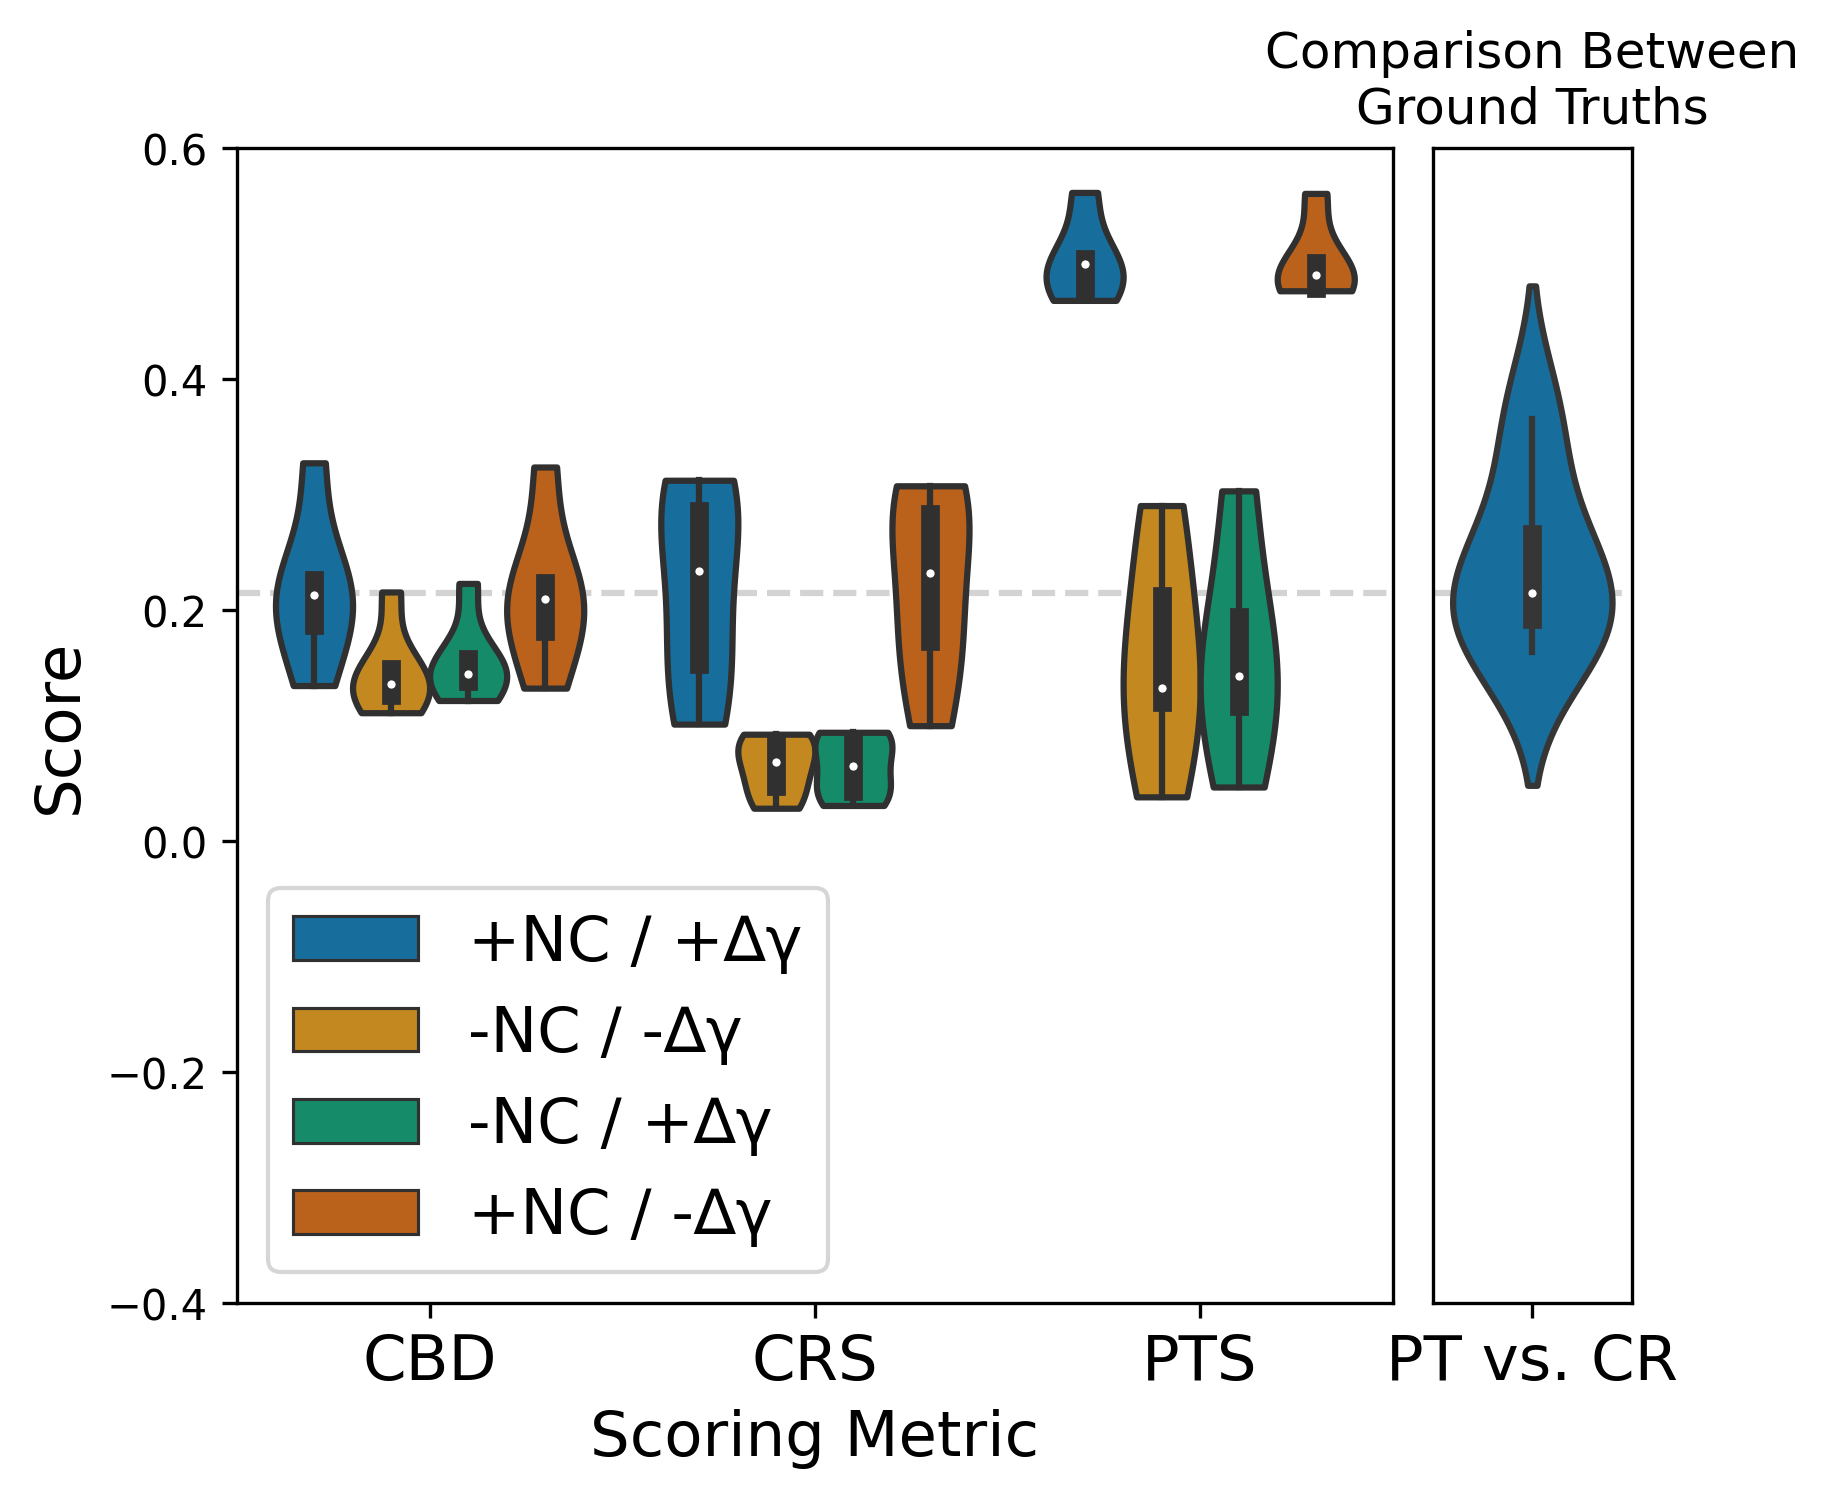

In [4]:
mosaic = """AAAAAB
AAAAAB
AAAAAB
AAAAAB"""

fig, axes = plt.subplot_mosaic(mosaic=mosaic, figsize=(6,5), dpi=300)

sns.violinplot(data=df, x='Metric',y='Values', hue='Method', cut=0, scale='width',
               palette="colorblind", ax=axes['A'])
axes['A'].set_xticks(ticks=[0,1,2], labels=['CBD','CRS','PTS'], fontsize=15)
axes['A'].set_xlabel('Scoring Metric', fontsize=15)
axes['A'].set_ylabel('Score', fontsize=15)
axes['A'].set_ylim((-0.4,0.6))
axes['A'].legend(fontsize=15, loc='lower left')
axes['A'].axhline(y=np.median(truths), zorder=0, color='lightgrey', linestyle='--')
axes['B'].axhline(y=np.median(truths), zorder=0, color='lightgrey', linestyle='--')
sns.violinplot(y=np.array(truths), palette="colorblind", ax=axes['B'], color='grey')
axes['B'].set_yticks([])
axes['B'].set_title("Comparison Between\nGround Truths")
axes['B'].set_xticks(ticks=[0], labels=['PT vs. CR'], fontsize=15)
axes['B'].set_facecolor("whitesmoke")
axes['B'].set_ylim((-0.4,0.6))

for fig in plt.get_fignums():
    fig = plt.figure(fig)
    # Set the figure facecolor to transparent
    fig.patch.set_facecolor('none')

    # Loop over the axes in the figure
    for ax in fig.get_axes():
        # Set the axes facecolor to white
        ax.set_facecolor('white')

plt.savefig("../figures/2.39.0_model_components.png", bbox_inches='tight')
plt.show()

# No smoothing

In [4]:
metrics = ['CBD','CRS','PTS']


ldatasets = ['mini_V3', 'mini_MN', 'mini_MD',
           'midi_NM', 'midi_Ne', 'maxi']

sdatasets = ['splicing_mini_V3', 'splicing_mini_MN', 'splicing_mini_MD',
           'splicing_midi_NM', 'splicing_midi_Ne', 'splicing_maxi']


lmethods = ['velvet','dynamo']
smethods = ['velvetsplicing','scVelo','velovi','UniTVelo','kvelo']

mdict = {}
for mtrc in metrics:
    bdict = {}
    for meth in lmethods:
        scores = []
        for data in ldatasets:
            if (data != 'maxi') or (mtrc != 'PTS'):
                score = np.load(home+f"{data}_{meth}_RAW_{mtrc}.npy")
                scores.append(np.mean(score))
        bdict[meth] = scores

    for meth in smethods:
        scores = []
        for data in sdatasets:
            if (data != 'splicing_maxi') or (mtrc != 'PTS'):
                score = np.load(home+f"{data}_{meth}_RAW_{mtrc}.npy")
                scores.append(np.mean(score))
        bdict[meth.replace('velvetsplicing','svelvet')] = scores
    mdict[mtrc] = bdict
    
metriclist = []
methodlist = []
valueslist = []
for metric, dic in mdict.items():
    submethodlist = []
    subvalueslist = []
    for meth, val in dic.items():
        subvalueslist.extend(val)
        submethodlist.extend([meth]*len(val))
    metriclist.extend([metric]*len(subvalueslist))
    methodlist.extend(submethodlist)
    valueslist.extend(subvalueslist)
    
df = pd.DataFrame({'Method':methodlist,'Values':valueslist,'Metric':metriclist})

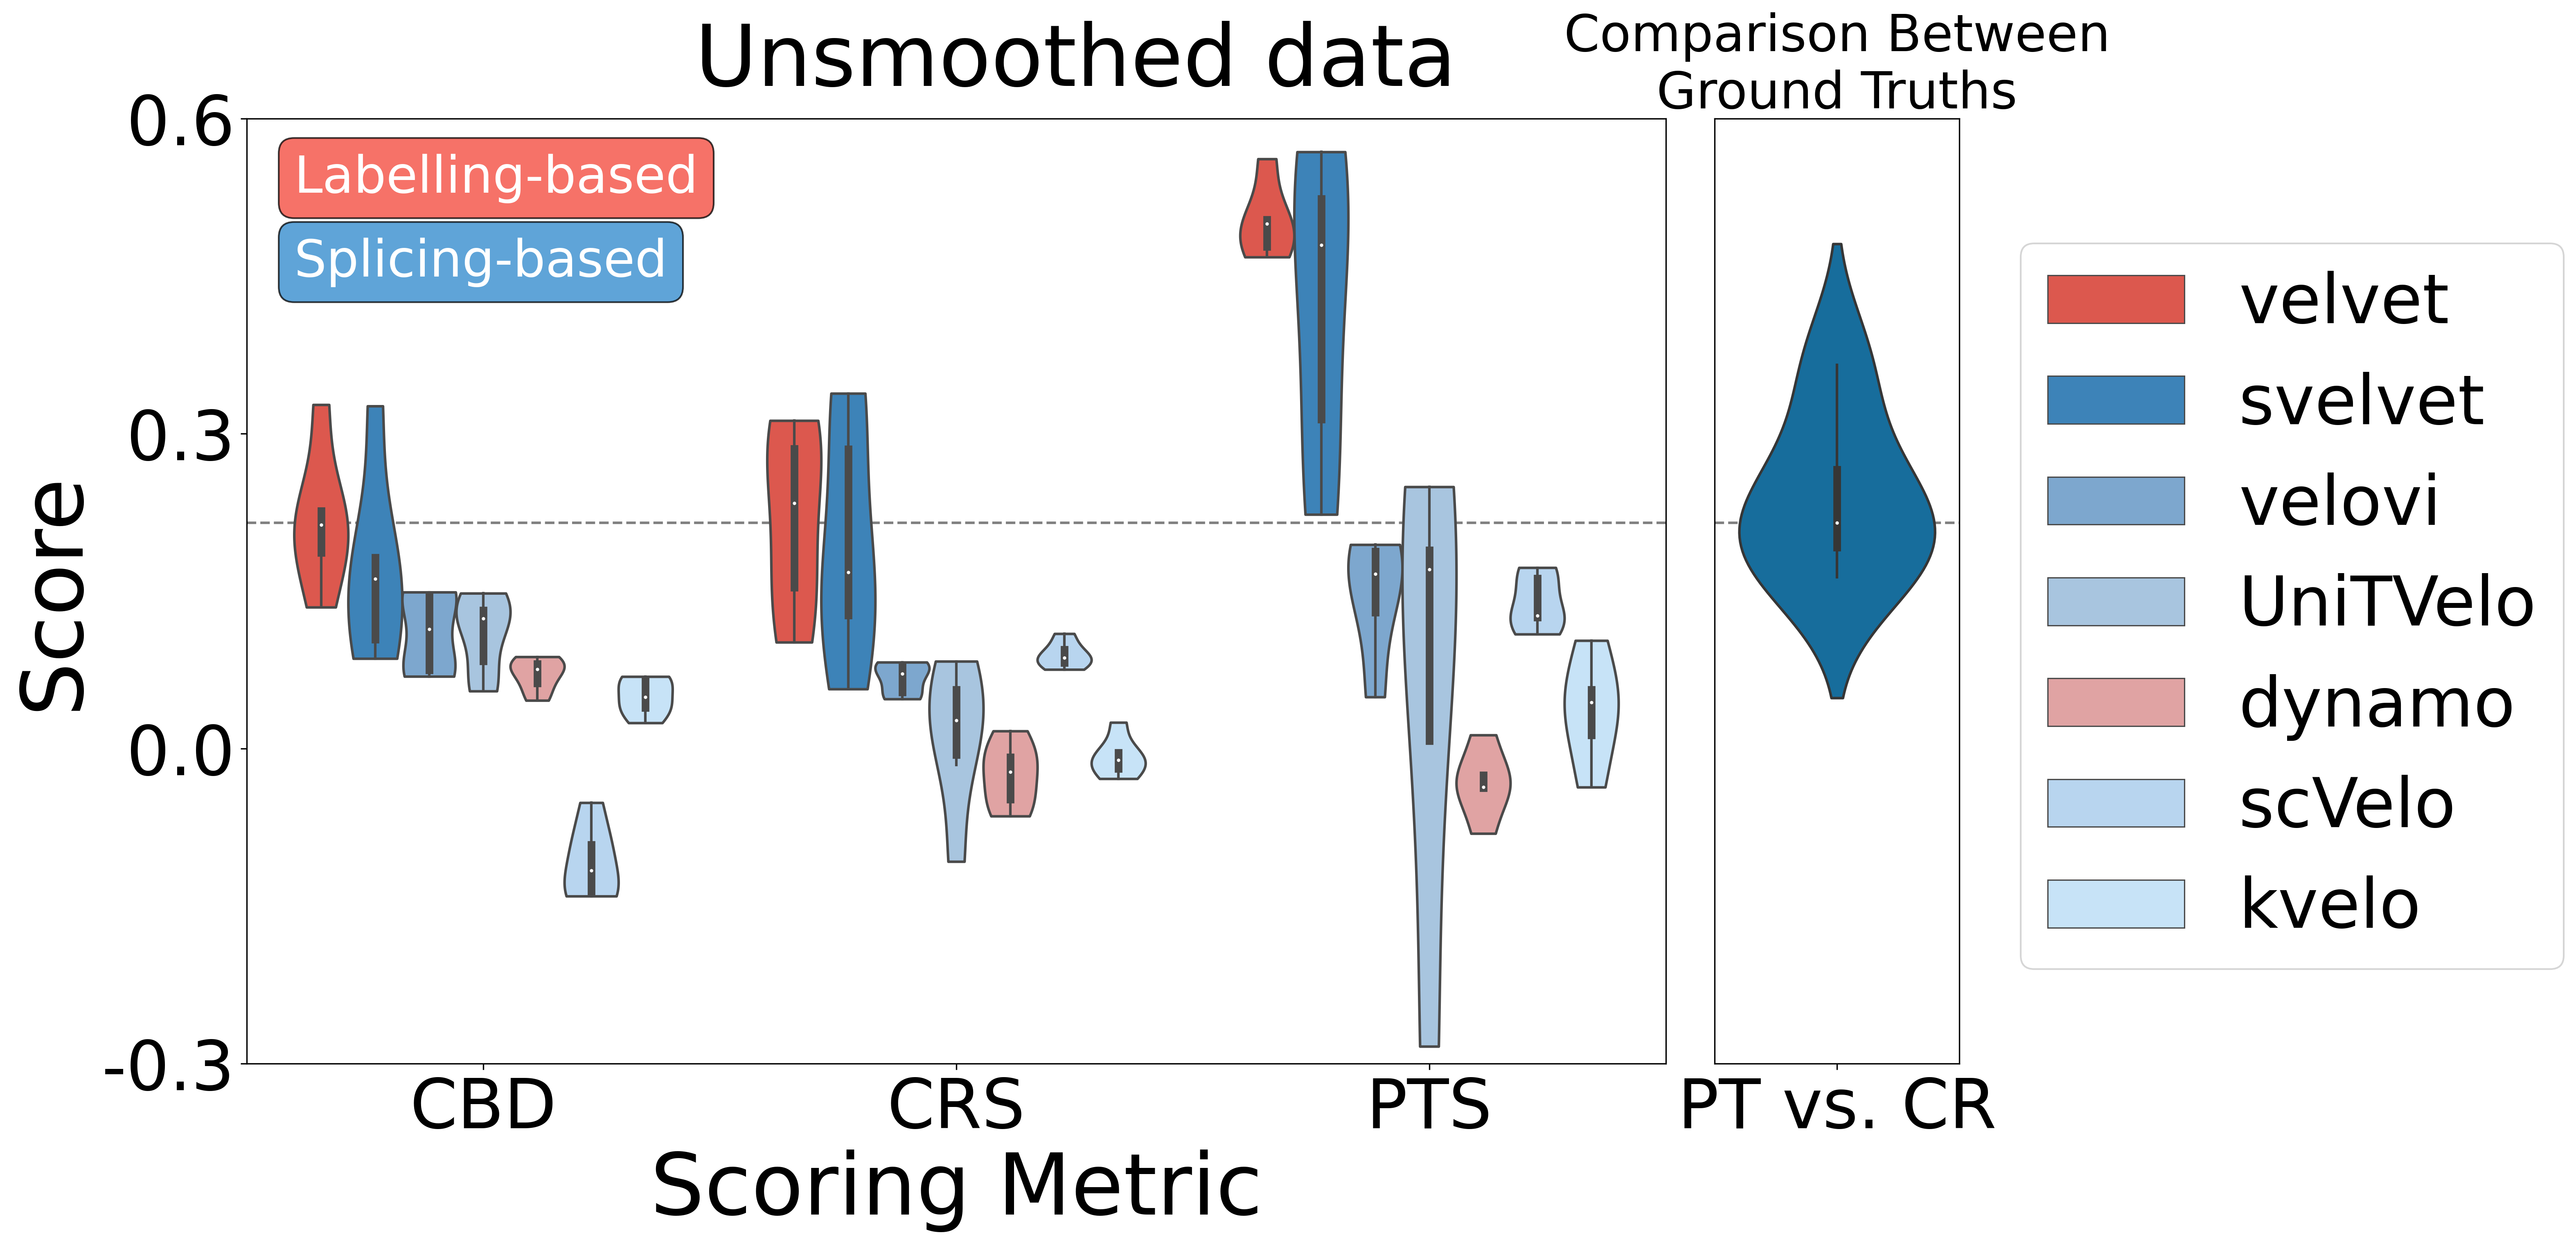

In [10]:
horder = ['velvet','svelvet','velovi','UniTVelo','dynamo','scVelo','kvelo']

my_pal = {'velvet':'#f44336',
          'svelvet':'#2986cc',
          'velovi':'#6fa8dc',
          'UniTVelo':'#9fc5e8',
          'dynamo':'#ea9999',
          'scVelo':'#afd5f8',
          'kvelo':'#bfe5ff'}

mosaic = """AAAAAB
AAAAAB
AAAAAB
AAAAAB"""

fig, axes = plt.subplot_mosaic(mosaic=mosaic, figsize=(18,10), dpi=300)

sns.violinplot(data=df, x='Metric',y='Values', hue='Method', cut=0, scale='width', 
               hue_order=horder, palette=my_pal, ax=axes['A'])
axes['A'].legend(fontsize=22)
axes['B'].axhline(y=np.median(truths), zorder=0, color='grey', linestyle='--')
axes['A'].axhline(y=np.median(truths), zorder=0, color='grey', linestyle='--')
sns.violinplot(y=np.array(truths), palette="colorblind", ax=axes['B'], color='grey')
axes['B'].set_yticks([])
axes['A'].set_yticks(np.linspace(-0.3,0.6, 4),np.round(np.linspace(-0.3,0.6, 4),1), fontsize=40)
axes['B'].set_title("Comparison Between\nGround Truths", fontsize=30)
axes['B'].set_xticks(ticks=[0], labels=['PT vs. CR'], fontsize=40)
axes['B'].set_facecolor("whitesmoke")
axes['A'].set_ylim((-0.3,0.6))
axes['B'].set_ylim((-0.3,0.6))
axes['A'].set_xticks(ticks=[0,1,2], labels=['CBD','CRS','PTS'], fontsize=40)
axes['A'].set_xlabel('Scoring Metric', fontsize=50)
axes['A'].set_ylabel('Score', fontsize=50)

props = dict(boxstyle='round', facecolor='#f44336', alpha=0.75)
axes['A'].text(-.4,0.53,'Labelling-based', fontsize=30, bbox=props, color='white')
props = dict(boxstyle='round', facecolor='#2986cc', alpha=0.75)
axes['A'].text(-.4,0.45,'Splicing-based', fontsize=30, bbox=props, color='white')
plt.suptitle("Unsmoothed data", fontsize=50, y=0.96)
axes['A'].legend(loc=[1.25,0.1], fontsize=40)

for fig in plt.get_fignums():
    fig = plt.figure(fig)
    # Set the figure facecolor to transparent
    fig.patch.set_facecolor('none')

    # Loop over the axes in the figure
    for ax in fig.get_axes():
        # Set the axes facecolor to white
        ax.set_facecolor('white')

plt.savefig('../figures/2.39.1_unsmoothed_data.png', bbox_inches='tight')
plt.show()

# smoothed

In [27]:
metrics = ['CBD','CRS','PTS']


ldatasets = ['mini_V3', 'mini_MN', 'mini_MD',
           'midi_NM', 'midi_Ne', 'maxi']
sdatasets = ['splicing_mini_V3', 'splicing_mini_MN', 'splicing_mini_MD',
           'splicing_midi_NM', 'splicing_midi_Ne', 'splicing_maxi']


lmethods = ['velvet_SMOOTH','dynamo']
smethods = ['velvetsplicing_SMOOTH','scVelo','velovi','UniTVelo','kvelo']

mdict = {}
for mtrc in metrics:
    bdict = {}
    for meth in lmethods:
        scores = []
        for data in ldatasets:
            if (data != 'maxi') or (mtrc != 'PTS'):
                try:
                    score = np.load(home+f"{data}_{meth}_{mtrc}.npy")
                except FileNotFoundError:
                    if meth=='velovi':
                        score=0
                    else:
                        print("Something's gone wrong")
                        break
                scores.append(np.mean(score))
        bdict[meth.replace('_SMOOTH','')] = scores

    for meth in smethods:
        scores = []
        for data in sdatasets:
            if (data != 'splicing_maxi') or (mtrc != 'PTS'):
                try:
                    score = np.load(home+f"{data}_{meth}_{mtrc}.npy")
                except FileNotFoundError:
                    if meth=='velovi':
                        score=0
                    else:
                        print("Something's gone wrong")
                        break
                scores.append(np.mean(score))
        bdict[meth.replace('_SMOOTH','')] = scores
    mdict[mtrc] = bdict
    
metriclist = []
methodlist = []
valueslist = []
for metric, dic in mdict.items():
    submethodlist = []
    subvalueslist = []
    for meth, val in dic.items():
        subvalueslist.extend(val)
        submethodlist.extend([meth]*len(val))
    metriclist.extend([metric]*len(subvalueslist))
    methodlist.extend(submethodlist)
    valueslist.extend(subvalueslist)
    
df = pd.DataFrame({'Method':methodlist,'Values':valueslist,'Metric':metriclist})

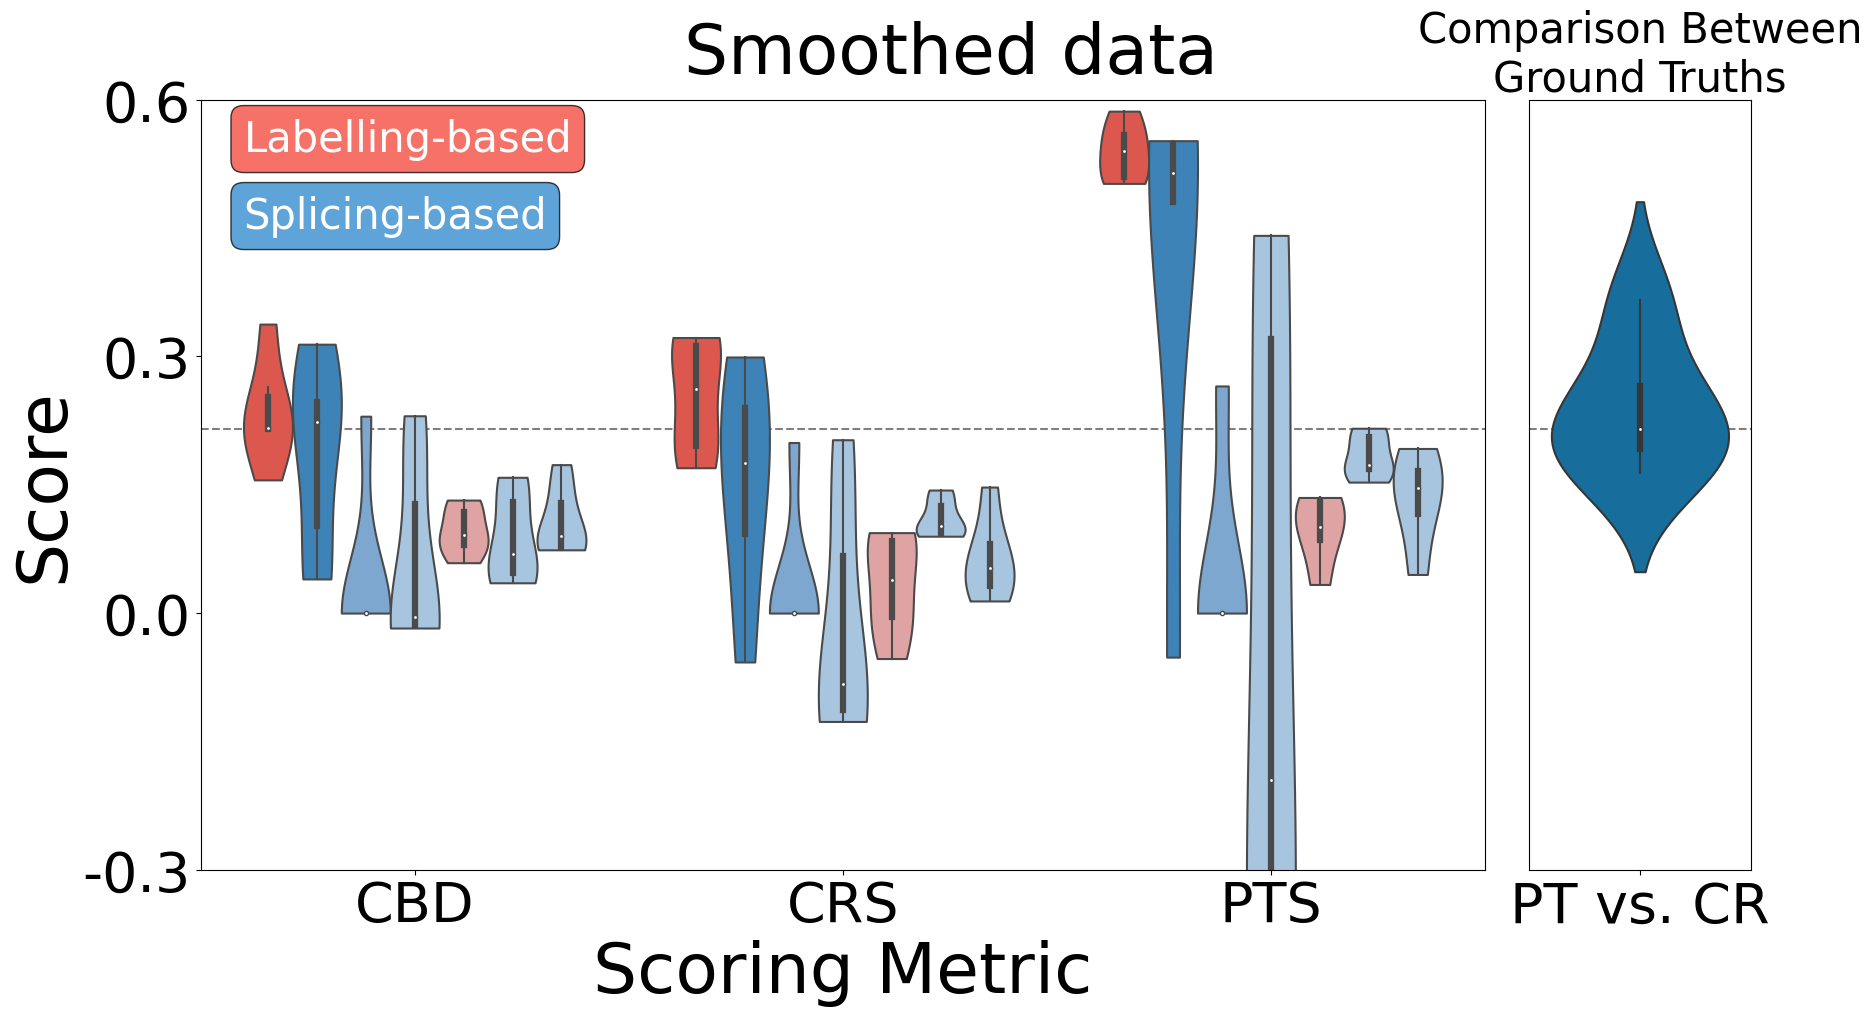

In [30]:
horder = ['velvet','velvetsplicing','velovi','UniTVelo','dynamo','scVelo','kvelo']

my_pal = {'velvet':'#f44336',
          'velvetsplicing':'#2986cc',
          'velovi':'#6fa8dc',
          'UniTVelo':'#9fc5e8',
          'dynamo':'#ea9999',
          'scVelo':'#9fc5e8',
          'kvelo':'#9fc5e8'}

mosaic = """AAAAAB
AAAAAB
AAAAAB
AAAAAB"""

fig, axes = plt.subplot_mosaic(mosaic=mosaic, figsize=(20,10))

sns.violinplot(data=df, x='Metric',y='Values', hue='Method', cut=0, scale='width', 
               hue_order=horder, palette=my_pal, ax=axes['A'])
axes['B'].axhline(y=np.median(truths), zorder=0, color='grey', linestyle='--')
axes['A'].axhline(y=np.median(truths), zorder=0, color='grey', linestyle='--')
sns.violinplot(y=np.array(truths), palette="colorblind", ax=axes['B'], color='grey')
axes['B'].set_yticks([])
axes['A'].set_yticks(np.linspace(-0.3,0.6, 4),np.round(np.linspace(-0.3,0.6, 4),1), fontsize=40)
axes['B'].set_title("Comparison Between\nGround Truths", fontsize=30)
axes['B'].set_xticks(ticks=[0], labels=['PT vs. CR'], fontsize=40)
axes['B'].set_facecolor("whitesmoke")
axes['A'].set_ylim((-0.3,0.6))
axes['B'].set_ylim((-0.3,0.6))
axes['A'].set_xticks(ticks=[0,1,2], labels=['CBD','CRS','PTS'], fontsize=40)
axes['A'].set_xlabel('Scoring Metric', fontsize=50)
axes['A'].set_ylabel('Score', fontsize=50)
axes['A'].legend_.remove()
props = dict(boxstyle='round', facecolor='#f44336', alpha=0.75)
axes['A'].text(-.4,0.54,'Labelling-based', fontsize=30, bbox=props, color='white')
props = dict(boxstyle='round', facecolor='#2986cc', alpha=0.75)
axes['A'].text(-.4,0.45,'Splicing-based', fontsize=30, bbox=props, color='white')
plt.suptitle("Smoothed data", fontsize=50, y=0.96)

for fig in plt.get_fignums():
    fig = plt.figure(fig)
    # Set the figure facecolor to transparent
    fig.patch.set_facecolor('none')

    # Loop over the axes in the figure
    for ax in fig.get_axes():
        # Set the axes facecolor to white
        ax.set_facecolor('white')

plt.savefig('../figures/2.39.2_smoothed_data.png', bbox_inches='tight')
plt.show()

# SDE

In [15]:
metrics = ['CBD','CRS','PTS']


ldatasets = ['mini_V3', 'mini_MN', 'mini_MD',
           'midi_NM', 'midi_Ne', 'maxi']

sdatasets = []


lmethods = ['velvetSDE','velvet']
smethods = []

mdict = {}
for mtrc in metrics:
    bdict = {}
    for meth in lmethods:
        scores = []
        for data in ldatasets:
            if (data != 'maxi') or (mtrc != 'PTS'):
                score = np.load(home+f"{data}_{meth}_RAW_{mtrc}.npy")
                scores.append(np.mean(score))
        bdict[meth] = scores

    for meth in smethods:
        scores = []
        for data in sdatasets:
            if (data != 'splicing_maxi') or (mtrc != 'PTS'):
                score = np.load(home+f"{data}_{meth}_RAW_{mtrc}.npy")
                scores.append(np.mean(score))
        bdict[meth] = scores
    mdict[mtrc] = bdict
    
metriclist = []
methodlist = []
valueslist = []
for metric, dic in mdict.items():
    submethodlist = []
    subvalueslist = []
    for meth, val in dic.items():
        subvalueslist.extend(val)
        submethodlist.extend([meth]*len(val))
    metriclist.extend([metric]*len(subvalueslist))
    methodlist.extend(submethodlist)
    valueslist.extend(subvalueslist)
    
df = pd.DataFrame({'Method':methodlist,'Values':valueslist,'Metric':metriclist})

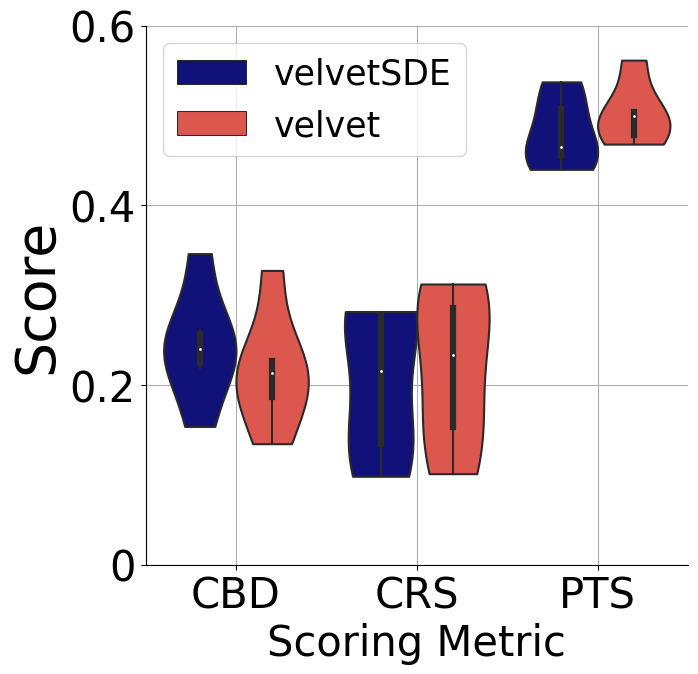

In [23]:
horder = ['velvetSDE','velvet']

my_pal = {'velvet':'#f44336',
          'velvetSDE':'darkblue',}

mosaic = """AAAA
AAAA
AAAA
AAAA"""

fig, axes = plt.subplot_mosaic(mosaic=mosaic, figsize=(7,7))

sns.violinplot(data=df, x='Metric',y='Values', hue='Method', cut=0, scale='width', 
               hue_order=horder, palette=my_pal, ax=axes['A'])
axes['A'].legend(fontsize=25)
axes['A'].set_ylim((-0.0,0.6))
axes['A'].set_ylabel("Scores", fontsize=30)
axes['A'].set_xticks(ticks=[0,1,2], labels=['CBD','CRS','PTS'], fontsize=30)
axes['A'].set_xlabel('Scoring Metric', fontsize=30)
axes['A'].set_ylabel('Score', fontsize=40)
axes['A'].set_yticks([0,0.2,0.4,0.6],[0,0.2,0.4,0.6], fontsize=30)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for fig in plt.get_fignums():
    fig = plt.figure(fig)
    # Set the figure facecolor to transparent
    fig.patch.set_facecolor('none')

    # Loop over the axes in the figure
    for ax in fig.get_axes():
        # Set the axes facecolor to white
        ax.set_facecolor('white')
axes['A'].grid(True, zorder=-1)
axes['A'].set_axisbelow(True)
plt.savefig('../figures/2.39.3_SDE.png', bbox_inches='tight')
plt.show()